# MNIST Hand Written Digit Classification 
* You are given the MNIST dataset below, select two digits from the data, e.g. 0 and 5, and 
* use any two machine learning models to classify the two different images. Each method is 50 points.
* Please specify how you train your models, how you obtain your model parameters, and how you evaluate your model.
* (Bonus 20 points) Use any one method to classify any three digits (e.g. 0 vs 1 vs 2)
* (Bonus 20 points) Can you write down a digit on a paper, take a picture, and let your model tell which digit is it?
* (Bayesian bonus) If you are able to give Bayesian intpretation of your model, a total of 20 bonus points.
* Mandatory part: 100 points, bonus parts: 40 points. Perfect score: 160 points. (your score)/(100) * 15 is the total
* credit to your final grade

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape) 
print(y.shape)

(70000, 784)
(70000,)


In [12]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [14]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

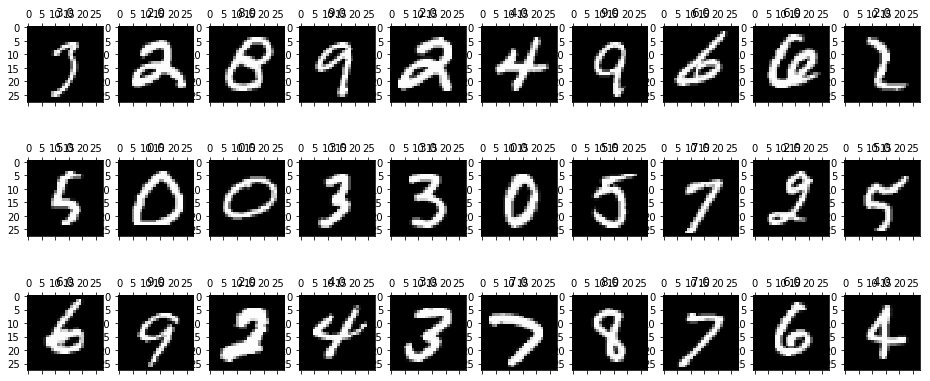

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

# Random Forest

In [16]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
from sklearn.datasets.base import get_data_home
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [49]:
import pandas as pd
pixels = pd.DataFrame(mnist.data)
labels=pd.DataFrame(mnist.target)

In [50]:
pixels

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
labels.loc[0].values

array([0.])

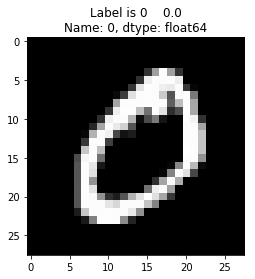

In [54]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
label=labels.loc[0]
pixel=pixels.loc[0]
pixel=np.array(pixel,dtype='uint8')
pixel=pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap='gray')
plt.show()

In [253]:
lz=df.loc[(df['label']=='5.0') | (df['label']=='9.0') ] #selecting two labels for Random forest, Bernaoulii Naive bayes and decision tree
X=lz.iloc[:, 0:784]
y=lz.iloc[:,784]


In [197]:
#spliting data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(mnist.data,mnist.target,test_size=1/7.0)

In [198]:
X_train.shape

(60000, 784)

In [199]:
X_test.shape

(10000, 784)

In [200]:
X_train[0] #pixels

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 134, 153, 155,
       253, 253, 114,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 151, 22

In [201]:
y_train[0] #digit

5.0

In [202]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [203]:
y_pred =model.predict(X_test)

In [204]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9498

In [205]:
X_test[0] #we will test and see if our model predicts correctly or not

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  11,  97, 178, 254,
       254, 255, 152,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   8,  89,  87, 217, 253,
       253, 253, 253, 253, 253,  63,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  20, 229, 25

In [206]:
y_test[0]

2.0

In [207]:
model.predict(X_test[0].reshape(1,-1))

array([2.])

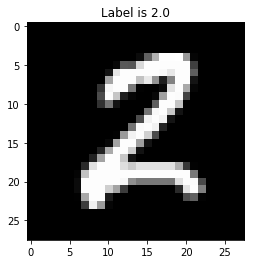

In [208]:
label=y_test[0]
pixel=X_test[0]
pixel=np.array(pixel,dtype='uint8')
pixel=pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap='gray')
plt.show()

In [254]:
# we see from the image that our model predicts cprrectly

# DecisionTree

In [209]:
from sklearn.model_selection import train_test_split #splliting data
X_train,X_test, y_train, y_test= train_test_split(mnist.data,mnist.target,test_size=1/7.0)

In [210]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [211]:
X_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [212]:
y_train[1]

9.0

In [213]:
from sklearn.tree import DecisionTreeClassifier #fitting model
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [256]:
y_pred =model.predict(X_test) #prediction


In [215]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_pred,y_test)     #accuracy
a

0.8708

In [216]:
X_test[1] #pixel 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  32, 229,  28,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 131, 252,  28,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10, 197, 252,  28,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 128, 252, 252,  28,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 204, 253, 15

In [217]:
y_test[1] ##we will test and see if our model predicts correctly or not

6.0

In [218]:
model.predict(X_test[1].reshape(1,-1)) 

array([6.])

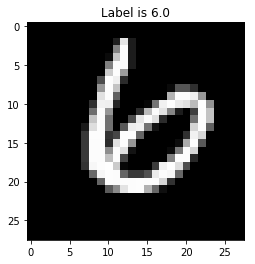

In [219]:
label=y_test[1]
pixel=X_test[1]
pixel=np.array(pixel,dtype='uint8')
pixel=pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap='gray')
plt.show()

In [258]:
# we see from the image that our model predicts correctly

# Naive Bayes

In [220]:
from sklearn.model_selection import train_test_split #splitng data
X_train,X_test, y_train, y_test= train_test_split(mnist.data,mnist.target,test_size=1/7.0)

In [221]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [222]:
X_train[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        21,  51, 213, 254, 252, 130,  51,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  21, 161, 250, 250, 252, 250, 250, 250,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  51, 250, 250, 250, 252, 250, 250, 250, 123,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 213, 250, 250, 250, 252, 250, 25

In [223]:
y_train[2]

2.0

In [224]:
from sklearn.naive_bayes import BernoulliNB #fitting model
model=BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [225]:
y_pred =model.predict(X_test) #predcition

In [226]:
from sklearn.metrics import accuracy_score #accuracy
accuracy_score(y_pred,y_test)

0.8284

In [227]:
X_test[2] #test pixel

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [228]:
y_test[2] #test digit ##we will test and see if our model predicts correctly or not

9.0

In [229]:
model.predict(X_test[2].reshape(1,-1))

array([9.])

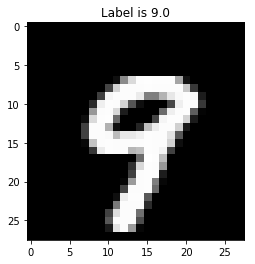

In [230]:
label=y_test[2]
pixel=X_test[2]
pixel=np.array(pixel,dtype='uint8')
pixel=pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap='gray')
plt.show()

In [259]:
# we see from the image that our model predicts correctly

# Seleting 3 labels 

# Gaussian Naive Bayes

In [235]:
l=df.loc[(df['label']=='5.0') | (df['label']=='3.0')| (df['label']=='9.0') ] #selecting 3 labels
X=l.iloc[:, 0:784]
y=l.iloc[:,784]


In [237]:
from sklearn.model_selection import train_test_split #spliting data
X_train,X_test, y_train, y_test= train_test_split(mnist.data,mnist.target,test_size=1/7.0)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [240]:
from sklearn.naive_bayes import GaussianNB #fitting model

clf = GaussianNB()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [242]:
#Accuracy for Gaussian Naive Bayes 
GNB = accuracy_score(y_test,preds)
GNB

0.5525

In [243]:
X_test[2] #pixel

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  98, 255,  51,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   7, 172, 247, 253,  86,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 254, 253, 210,
        22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91, 247, 254,
       231,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [249]:
y_test[8] #test digit  ##we will test and see if our model predicts correctly or not

8.0

In [250]:
model.predict(X_test[8].reshape(1,-1)) #predction correct

array([8.])

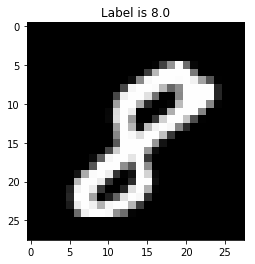

In [252]:
label=y_test[8]
pixel=X_test[8]
pixel=np.array(pixel,dtype='uint8')
pixel=pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap='gray')
plt.show()

In [260]:
# we see from the image that our model predicts correctly